## Домашнее задание <a class='anchor' id='hw'>

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность.
2. Проведите анализ — что приводит к ухудшению точности нейронной сети?
3. Что приводит к увеличению ее точности?

#### 1. Импорты <a class='anchor' id='imports'>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
np.random.seed(1)
from sklearn.model_selection import train_test_split

#### 2. Вспомогательные функции <a class='anchor' id='utils'>

In [2]:
# вычисление сигмоид функции
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

# аналог one-hot кодирования
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

#### 3. Загрузка и обработка данных <a class='anchor' id='data'>

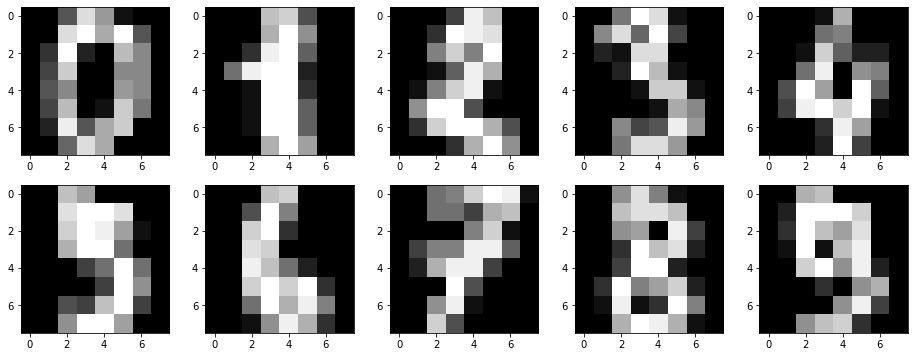

In [3]:
X, y = load_digits(return_X_y=True)
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8, 8]), cmap='gray')

In [4]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#### 4. Обучение двухслойной нейронной сети <a class='anchor' id='fit'>

In [22]:
params = {
    'neuron_numb' : 20, # было 5
    'learning_rate' : 0.01, # было 0.1
    'num_epochs' : 1000, # было 100
}
errors = []
metrics = []

In [12]:
def nn_fit(X_train, y_train):
    neuron_numb = params['neuron_numb']
    learning_rate = params['learning_rate']
    num_epochs = params['num_epochs']
    # присваивание случайных весов
    w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
    w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

    # процесс обучения
    for i in range(num_epochs):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))
        layers = [layer0, layer1, layer2]

        # обратное распространение (back propagation)
        # с использованием градиентного спуска
        layer2_error = layer2 - y_train  # производная функции потерь
        layer2_grad = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_grad.dot(w1.T)
        layer1_grad = layer1_error * sigmoid_deriv(layer1)

        w1 -= layer1.T.dot(layer2_grad) * learning_rate
        w0 -= layer0.T.dot(layer1_grad) * learning_rate

        # ошибка модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        # метрики качества
        preds = np.argmax(layer2, axis=1)
        labels = np.argmax(y_train, axis=1)
        accuracy = (preds == labels).sum() * 100 / len(labels)
        metrics.append(accuracy)
    return w0, w1, layers, accuracy

In [23]:
w0, w1, layers, accuracy = nn_fit(X_train, y_train)

#### 5. Демонстрация полученных результатов <a class='anchor' id='demo'>

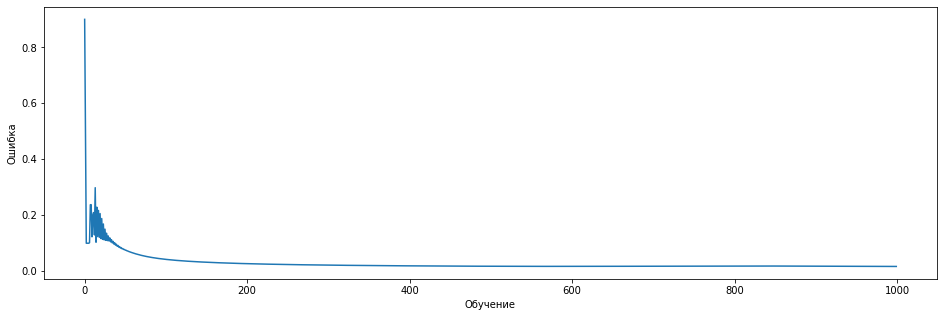

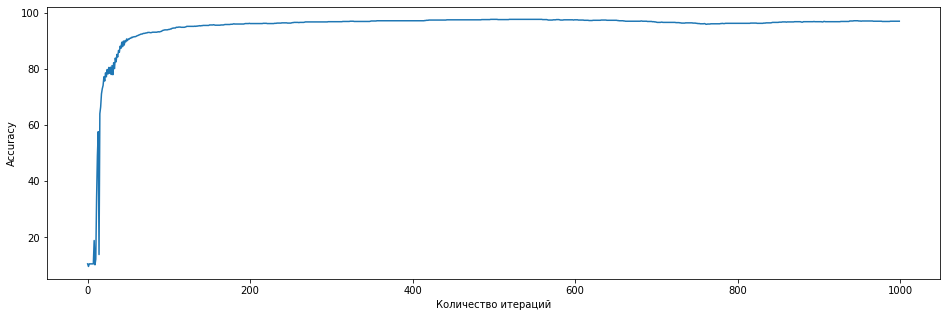

In [24]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

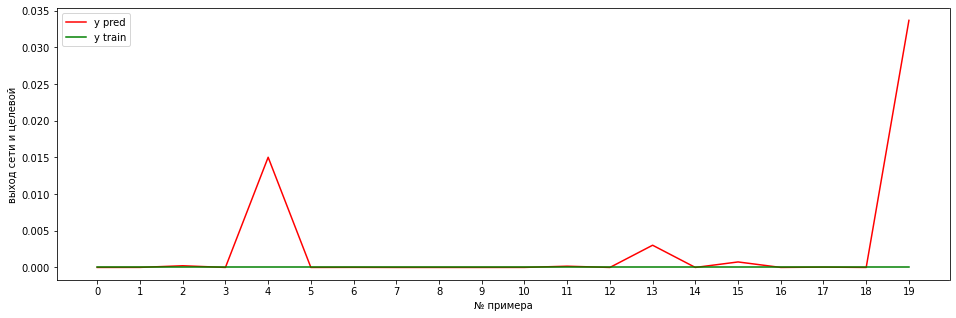

accuracy на обучении 96.92%


In [25]:
N = 20
label = 2
plt.figure(figsize=(16, 5))
plt.plot(layers[2][:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()
        
print(f"accuracy на обучении {accuracy:.2f}%")

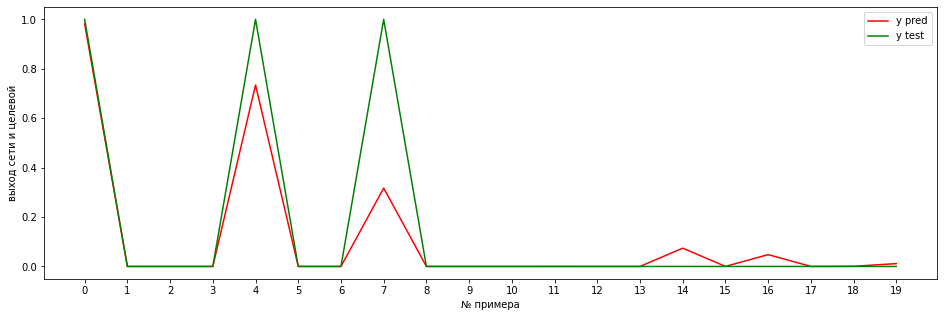

accuracy на тесте 93.77%


In [26]:
# прямое распространение(feed forward)
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
    
    
N = 20
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 1], 'r', label='y pred')
plt.plot(y_test[:N, 1], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

# метрика модели
preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")

#### 6. Выводы, пояснения <a class='anchor' id='demo'>

1. Для удобства пользования код разбит на логические блоки. Внутри блока №4 с обучением нейронной сети выделены отдельно параметры модели.  
2. Чтобы получить метрики повыше, необходимо увеличить количество эпох (хотя бы до 350) и уменьшить скорость обучения (до 0.01). Если скорость обучения не уменьшать, то градиентный спуск не будет сходиться, а модель - обучаться.
3. Количество нейронов скрытого слоя лучше брать от 10. При количестве от 1000 обучение начинает притормаживать.